In [1]:
# Import Libraries
import keras # Neural Network Library
from sklearn.impute import SimpleImputer

from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import plot_model # Print the network
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('horse.csv')
data.columns = ['Surgery','Age','Hospital Number','Rectal Temperature','Pulse','Respiratory Rate','Temperature of Extremities','Peripheral Pulse','Mucous Membranes','Capillary Refill Time','Pain','Peristalsis','Abdominal Distension','Nasogastric Tube','Nasogastric Reflux','Nasogastric Reflux PH','Rectal Examination Feces','Abdomen','Packed Cell Volume','Total Protein','Abdominocentesis Appearance','Abdominocentesis Total Protein','Outcome','Surgical Lesion','Lesion Site','Lesion Type','Lesion Subtype','CP Data']

data.head()

,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdominocentesis Total Protein,Outcome,Surgical Lesion,Lesion Site,Lesion Type,Lesion Subtype,CP Data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Surgery                         299 non-null    object 
 1   Age                             299 non-null    object 
 2   Hospital Number                 299 non-null    int64  
 3   Rectal Temperature              239 non-null    float64
 4   Pulse                           275 non-null    float64
 5   Respiratory Rate                241 non-null    float64
 6   Temperature of Extremities      243 non-null    object 
 7   Peripheral Pulse                230 non-null    object 
 8   Mucous Membranes                252 non-null    object 
 9   Capillary Refill Time           267 non-null    object 
 10  Pain                            244 non-null    object 
 11  Peristalsis                     255 non-null    object 
 12  Abdominal Distension            243 

In [3]:
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,24
Respiratory Rate,58
Temperature of Extremities,56
Peripheral Pulse,69
Mucous Membranes,47
Capillary Refill Time,32


Tratando as colunas do tipo object

In [4]:

from sklearn.preprocessing import LabelEncoder
#usando label enconder para converter as variáveis categoricas
encoder = LabelEncoder()

data['Surgery'] = encoder.fit_transform(data['Surgery'])
data['Age'] = encoder.fit_transform(data['Age'])
data['Temperature of Extremities'] = encoder.fit_transform(data['Temperature of Extremities'])
data['Peripheral Pulse'] = encoder.fit_transform(data['Peripheral Pulse'])
data['Mucous Membranes'] = encoder.fit_transform(data['Mucous Membranes'])
data['Capillary Refill Time'] = encoder.fit_transform(data['Capillary Refill Time'])
data['Pain'] = encoder.fit_transform(data['Pain'])
data['Peristalsis'] = encoder.fit_transform(data['Peristalsis'])
data['Abdominal Distension'] = encoder.fit_transform(data['Abdominal Distension'])
data['Nasogastric Tube'] = encoder.fit_transform(data['Nasogastric Tube'])
data['Nasogastric Reflux'] = encoder.fit_transform(data['Nasogastric Reflux'])
data['Rectal Examination Feces'] = encoder.fit_transform(data['Rectal Examination Feces'])
data['Abdomen'] = encoder.fit_transform(data['Abdomen'])
data['Abdominocentesis Appearance'] = encoder.fit_transform(data['Abdominocentesis Appearance'])
data['Outcome'] = encoder.fit_transform(data['Outcome'])
data['Surgical Lesion'] = encoder.fit_transform(data['Surgical Lesion'])
data['CP Data'] = encoder.fit_transform(data['CP Data'])

data.head()

,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdominocentesis Total Protein,Outcome,Surgical Lesion,Lesion Site,Lesion Type,Lesion Subtype,CP Data
0,0,0,530101,38.5,66.0,28.0,1,3,6,2,...,45.0,8.4,3,NaN,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,4,4,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,3,NaN,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,4,4,2,2,...,74.0,7.4,3,NaN,0,0,4300,0,0,0


Tratando dados nulos

In [5]:
# Cria o imputador que preenche NaN com a média dos dados
imputer = SimpleImputer(strategy='mean')
# Aplica imputação
X_imputado = imputer.fit_transform(data)
X_imputado = pd.DataFrame(X_imputado, columns=data.columns)
#verifica os NAN
print(X_imputado.isnull().sum())

data = X_imputado

Surgery                           0
Age                               0
Hospital Number                   0
Rectal Temperature                0
Pulse                             0
Respiratory Rate                  0
Temperature of Extremities        0
Peripheral Pulse                  0
Mucous Membranes                  0
Capillary Refill Time             0
Pain                              0
Peristalsis                       0
Abdominal Distension              0
Nasogastric Tube                  0
Nasogastric Reflux                0
Nasogastric Reflux PH             0
Rectal Examination Feces          0
Abdomen                           0
Packed Cell Volume                0
Total Protein                     0
Abdominocentesis Appearance       0
Abdominocentesis Total Protein    0
Outcome                           0
Surgical Lesion                   0
Lesion Site                       0
Lesion Type                       0
Lesion Subtype                    0
CP Data                     

Dividindo o conjundo de dados entre treino e teste

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Get column names before converting to numpy array
feature_columns = data.drop('Surgery', axis=1).columns

X = data.drop('Surgery', axis=1).values
y = data['Surgery'].values

# Criar o scaler
scaler = MinMaxScaler()

# Ajustar e transformar os dados
X_normalized = scaler.fit_transform(X)

# Transformar em DataFrame novamente (opcional)
X_normalized = pd.DataFrame(X_normalized, columns=feature_columns)

data = X_normalized

print(X_normalized.head())

   Age  Hospital Number  Rectal Temperature     Pulse  Respiratory Rate  \
0  0.0         0.002428            0.574074  0.233766          0.227273   
1  0.0         0.003414            0.703704  0.376623          0.136364   
2  0.0         0.002477            0.537037  0.064935          0.181818   
3  1.0         0.996821            0.685185  0.870130          0.863636   
4  0.0         0.002461            0.351852  0.480519          0.306818   

   Temperature of Extremities  Peripheral Pulse  Mucous Membranes  \
0                        0.25              0.75          1.000000   
1                        1.00              1.00          0.666667   
2                        0.50              0.50          0.833333   
3                        0.00              0.50          0.333333   
4                        1.00              1.00          0.333333   

   Capillary Refill Time  Pain  ...  Packed Cell Volume  Total Protein  \
0               0.666667   0.4  ...            0.423077     

In [7]:
target = y

In [8]:
data.shape

(299, 27)

In [9]:
data = X.copy()

Comparando colunas explicativas com a Vaiável target

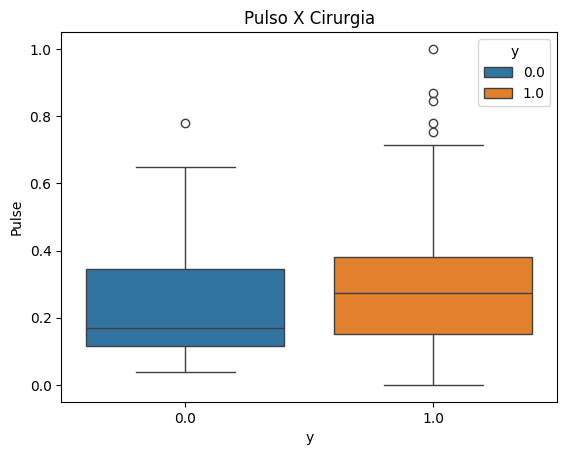

In [11]:
plot_df = X_normalized.copy()
plot_df['y'] = target

sns.boxplot(x='y', y='Pulse', hue='y', data=plot_df)
plt.title('Pulso X Cirurgia')
plt.show()

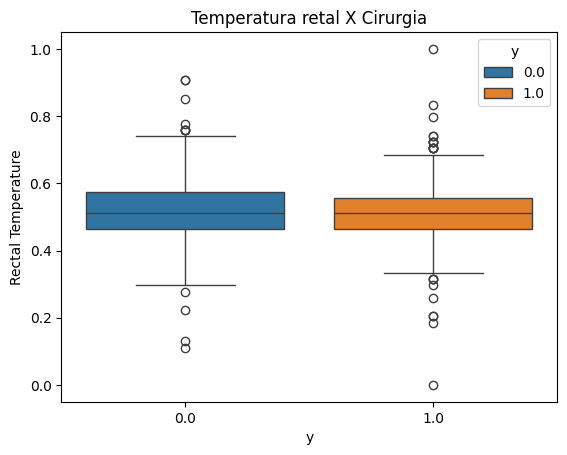

In [12]:
sns.boxplot(x='y', y='Rectal Temperature', hue='y', data=plot_df)
plt.title('Temperatura retal X Cirurgia')
plt.show()

Importando o TensorFlow

In [13]:
import tensorflow as tf

tf.random.set_seed(42)

versao_tersorFlow = tf.__version__
print(versao_tersorFlow)

2.19.0


Criando pesos e vieses

In [14]:
peso = tf.Variable(tf.random.normal([1]), name='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies')

In [15]:
peso

<tf.Variable 'peso:0' shape=(1,) dtype=float32, numpy=array([0.3274685], dtype=float32)>

In [16]:
vies

<tf.Variable 'vies:0' shape=(1,) dtype=float32, numpy=array([0.08422458], dtype=float32)>

In [17]:
print(f'Peso = {(peso.numpy())}')
print(f'Vies = {(vies.numpy())}')

Peso = [0.3274685]
Vies = [0.08422458]


Criando o neurônio


In [18]:
def neuronio(x):
  z = tf.add(tf.multiply(x, peso), vies)
  return z

In [19]:
exemplo = tf.constant(10.0)

In [20]:
neuronio(exemplo)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.3589096], dtype=float32)>

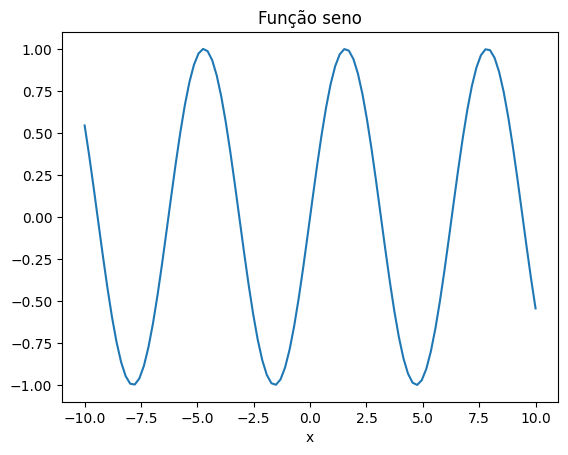

In [21]:
def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = tf.sin(x)

  plt.plot(x, y)
  plt.xlabel('x')
  plt.title('Função seno')
  plt.show()

gera_grafico()


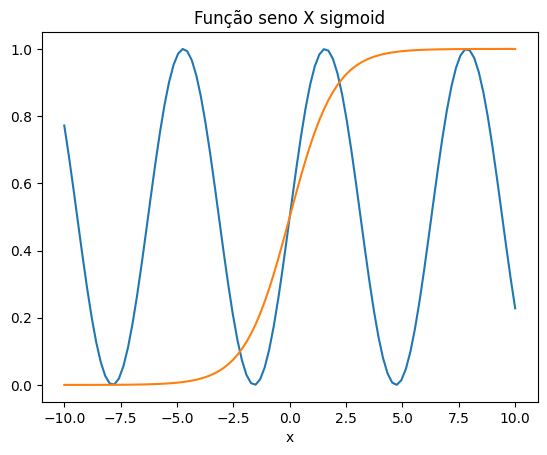

In [22]:
def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = (tf.sin(x) +1)/2
  y2 = tf.sigmoid(x)

  plt.plot(x, y)
  plt.plot(x, y2)
  plt.xlabel('x')
  plt.title('Função seno X sigmoid')
  plt.show()

gera_grafico()


In [23]:
probabilidade = tf.sigmoid(neuronio(tf.constant([10.0])))
probabilidade

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9663954], dtype=float32)>

In [24]:
probabilidade > 0.5

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [25]:
probabilidade = tf.sigmoid(neuronio(tf.constant(target,dtype=tf.float32)))

In [26]:
(probabilidade > 0.5)[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [27]:
target = (target > 0) * 1

In [28]:
y = tf.constant(target, dtype=tf.float32)
y[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 1., 0., 0., 1., 1., 0., 0.], dtype=float32)>

In [29]:
calcualo_loss = tf.keras.losses.BinaryCrossentropy()
perda = calcualo_loss(y_true=y,y_pred= probabilidade)


In [30]:
perda

<tf.Tensor: shape=(), dtype=float32, numpy=0.5990046858787537>

In [31]:
np.mean(y.numpy() == ((probabilidade.numpy() > 0.5) * 1))

np.float64(0.6020066889632107)

Importando a biblioteca scaler

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [33]:
X.shape[1]

27

In [34]:
tf.random.set_seed(42)

qtd_features = X.shape[1]
peso = tf.Variable(tf.random.normal([qtd_features, 1]), name='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies')


def neuronio(x):
  z = tf.add(tf.matmul(x, peso), vies)
  return z

In [35]:
vies.numpy(), peso.numpy()

(array([0.08422458], dtype=float32),
 array([[ 0.3274685 ],
        [-0.8426258 ],
        [ 0.3194337 ],
        [-1.4075519 ],
        [-2.3880599 ],
        [-1.0392479 ],
        [-0.5573232 ],
        [ 0.539707  ],
        [ 1.6994323 ],
        [ 0.28893656],
        [-1.5066116 ],
        [-0.26454744],
        [-0.59722406],
        [-1.9171132 ],
        [-0.62044144],
        [ 0.8504023 ],
        [-0.40604794],
        [-3.0258412 ],
        [ 0.9058464 ],
        [ 0.29855987],
        [-0.22561555],
        [-0.7616443 ],
        [-1.891714  ],
        [-0.9384712 ],
        [ 0.77852213],
        [-0.47338897],
        [ 0.97772694]], dtype=float32))

In [36]:
X[0]

array([0.00000000e+00, 5.30101000e+05, 3.85000000e+01, 6.60000000e+01,
       2.80000000e+01, 1.00000000e+00, 3.00000000e+00, 6.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 4.70754717e+00, 1.00000000e+00,
       0.00000000e+00, 4.50000000e+01, 8.40000000e+00, 3.00000000e+00,
       3.03960396e+00, 0.00000000e+00, 0.00000000e+00, 1.13000000e+04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [37]:
neuronio(tf.constant([X[0]], dtype=tf.float32))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-457562.84]], dtype=float32)>

In [38]:
probabilidade = tf.sigmoid(neuronio(tf.constant([[0.00000000e+00, 5.30101000e+05, 3.85000000e+01, 6.60000000e+01,
       2.80000000e+01, 1.00000000e+00, 3.00000000e+00, 6.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 4.70754717e+00, 1.00000000e+00,
       0.00000000e+00, 4.50000000e+01, 8.40000000e+00, 3.00000000e+00,
       3.03960396e+00, 0.00000000e+00, 0.00000000e+00, 1.13000000e+04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+001]])))
probabilidade


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

In [39]:
entrada = tf.constant(X, dtype=tf.float32)
probabilidade = tf.sigmoid(neuronio(entrada))
probabilidade[:10].numpy()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [40]:
calcualo_loss = tf.keras.losses.BinaryCrossentropy()
perda = calcualo_loss(y_true=y,y_pred= probabilidade)
perda.numpy()

np.float32(9.703201)

In [41]:
np.mean(y.numpy() == ((probabilidade.numpy() > 0.5) * 1))

np.float64(0.3979933110367893)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
                                                    stratify=y.numpy(), random_state=5533)
#

In [43]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train = tf.constant(x_train, dtype=tf.float32)
x_test = tf.constant(x_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

In [45]:
def run_all():
  global pesos, vies
  tf.random.set_seed(42)

  qtd_features = x_train.shape[1]
  pesos = tf.Variable(tf.random.normal([qtd_features, 1]), name='peso')
  vies = tf.Variable(tf.random.normal([1]), name='vies')

  def neuronio(x):
    z = tf.add(tf.matmul(x, pesos), vies)
    return z

  calculadora_perda = tf.keras.losses.BinaryCrossentropy()
  otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
  qtd_epocas = 2000

  perdas = []

  for epoca in range(qtd_epocas):
    with tf.GradientTape() as tape:
      probabilidade = tf.sigmoid(neuronio(x_train))
      custo = calculadora_perda(y_true=y_train, y_pred=probabilidade)

    gradientes = tape.gradient(custo,[pesos, vies])
    otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))

    perdas.append(custo.numpy())

    if (epoca + 1) % 100 == 0:
      print(f'Época {epoca+1}, Custo:{custo.numpy()}')

  return perdas

In [46]:
print('rate 0.0001')
learning_rate = 0.0001
perdas_00001 = run_all()
print('rate 0.01')
learning_rate = 0.01
perdas_001 = run_all()
print('rate 1.0')
learning_rate = 1.0
perdas_1 = run_all()
print('rate 10')
learning_rate = 10
perdas_10 = run_all()

rate 0.0001
Época 100, Custo:2.717241048812866
Época 200, Custo:2.185579299926758
Época 300, Custo:1.7833160161972046
Época 400, Custo:1.4986969232559204
Época 500, Custo:1.2945971488952637
Época 600, Custo:1.1480134725570679
Época 700, Custo:1.0360822677612305
Época 800, Custo:0.9457435607910156
Época 900, Custo:0.8707811236381531
Época 1000, Custo:0.8077363967895508
Época 1100, Custo:0.7543814778327942
Época 1200, Custo:0.7090722918510437
Época 1300, Custo:0.6704657077789307
Época 1400, Custo:0.6374386548995972
Época 1500, Custo:0.6090626120567322
Época 1600, Custo:0.5845759510993958
Época 1700, Custo:0.5633556246757507
Época 1800, Custo:0.5448909401893616
Época 1900, Custo:0.528762698173523
Época 2000, Custo:0.5146239995956421
rate 0.01
Época 100, Custo:2.717241048812866
Época 200, Custo:2.185579299926758
Época 300, Custo:1.7833160161972046
Época 400, Custo:1.4986969232559204
Época 500, Custo:1.2945971488952637
Época 600, Custo:1.1480134725570679
Época 700, Custo:1.0360822677612305


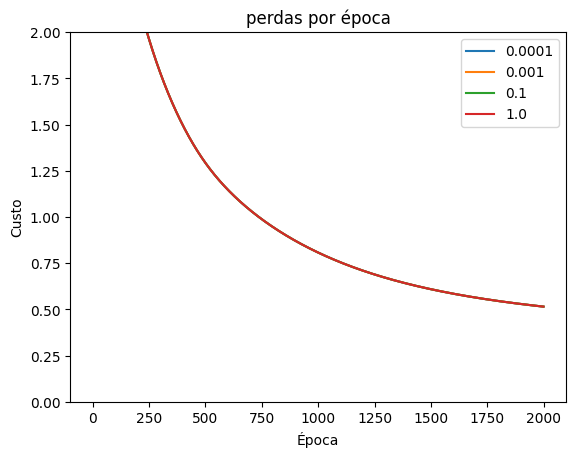

In [47]:
plt.plot(perdas_00001)
plt.plot(perdas_001)
plt.plot(perdas_1)
plt.plot(perdas_10)
plt.legend(['0.0001', '0.001', '0.1', '1.0'])
plt.title('perdas por época')
plt.xlabel('Época')
plt.ylabel('Custo')
plt.ylim(0,2)
plt.show()

Primeiro Modelo MLP com 1 Perceptron

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
                                                    stratify=y.numpy(), random_state=5533)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_np)
x_test_scaled = scaler.transform(x_test_np)

x_train = tf.constant(x_train_scaled, dtype=tf.float32)
x_test = tf.constant(x_test_scaled, dtype=tf.float32)
y_train = tf.constant(y_train_np, dtype=tf.float32)
y_test = tf.constant(y_test_np, dtype=tf.float32)

perdas = []
taxas_acerto = []
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
qtd_epocas = 2000

tf.random.set_seed(42)

qtd_features = x_train.shape[1]
pesos = tf.Variable(tf.random.normal([qtd_features, 1]), name='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies')

# Define neuronio locally to use the 'pesos' and 'vies' initialized here
def neuronio(x):
  z = tf.add(tf.matmul(x, pesos), vies)
  return z

#Obtendo o custo

for epoca in range(qtd_epocas):
  with tf.GradientTape() as tape:
    probabilidade = tf.sigmoid(neuronio(x_train))
    custo = calculadora_perda(y_true=y_train, y_pred=probabilidade)

  gradientes = tape.gradient(custo,[pesos, vies])
  otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))

  perdas.append(custo.numpy())

  #Calculando a taxa de acerto nos dados de teste

  probabilidade_teste = tf.sigmoid(neuronio(x_test))
  acertos = np.mean(y_test.numpy() == ((probabilidade_teste.numpy() > 0.5) * 1))
  taxas_acerto.append(acertos)

  if (epoca + 1) % 100 == 0:
    print(f'Época: {epoca+1}, Custo:{custo.numpy():.4f}, Taxa de acerto: {acertos:.4f}')

Época: 100, Custo:2.7172, Taxa de acerto: 0.5033
Época: 200, Custo:2.1856, Taxa de acerto: 0.5133
Época: 300, Custo:1.7833, Taxa de acerto: 0.5267
Época: 400, Custo:1.4987, Taxa de acerto: 0.5300
Época: 500, Custo:1.2946, Taxa de acerto: 0.5433
Época: 600, Custo:1.1480, Taxa de acerto: 0.5433
Época: 700, Custo:1.0361, Taxa de acerto: 0.5467
Época: 800, Custo:0.9457, Taxa de acerto: 0.5467
Época: 900, Custo:0.8708, Taxa de acerto: 0.5500
Época: 1000, Custo:0.8077, Taxa de acerto: 0.5500
Época: 1100, Custo:0.7544, Taxa de acerto: 0.5500
Época: 1200, Custo:0.7091, Taxa de acerto: 0.5500
Época: 1300, Custo:0.6705, Taxa de acerto: 0.5567
Época: 1400, Custo:0.6374, Taxa de acerto: 0.5600
Época: 1500, Custo:0.6091, Taxa de acerto: 0.5600
Época: 1600, Custo:0.5846, Taxa de acerto: 0.5633
Época: 1700, Custo:0.5634, Taxa de acerto: 0.5633
Época: 1800, Custo:0.5449, Taxa de acerto: 0.5600
Época: 1900, Custo:0.5288, Taxa de acerto: 0.5600
Época: 2000, Custo:0.5146, Taxa de acerto: 0.5567


In [49]:
print(f'Menor custo obtido com um perceptron: {min(perdas)}')
print(f'Maior taxa de acerto obtida com um perceptron: {max(taxas_acerto)}')

Menor custo obtido com um perceptron: 0.5146239995956421
Maior taxa de acerto obtida com um perceptron: 0.5633333333333334


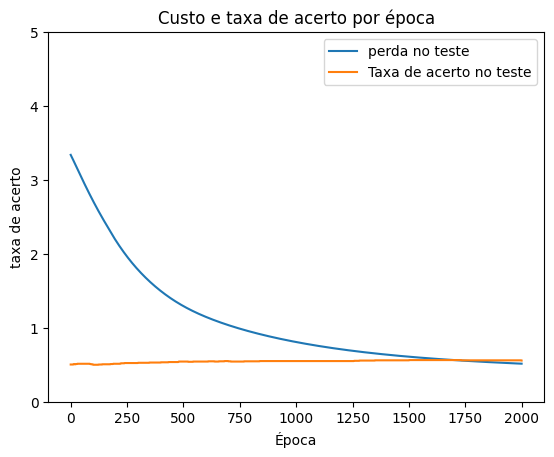

In [50]:
plt.plot(perdas)
plt.plot(taxas_acerto)
plt.title('Custo e taxa de acerto por época')
plt.legend(['perda no teste', 'Taxa de acerto no teste'])
plt.xlabel('Época')
plt.ylabel('taxa de acerto')
plt.ylim(0,5)
plt.show()

Primeiro modelo usando camada oculta

In [51]:
def obter_pesos_vies(tamanho_da_anterior, n_neuronios_nessa_camada):
  tf.random.set_seed(31)
  pesos_camada = tf.Variable(tf.random.normal([tamanho_da_anterior, n_neuronios_nessa_camada]))
  vies_camada = tf.Variable(tf.random.normal([n_neuronios_nessa_camada]))
  return pesos_camada, vies_camada

In [52]:
quantidade_de_features = x_train.shape[1]

pesos1, vies1 = obter_pesos_vies(quantidade_de_features, 3)
pesos2, vies2 = obter_pesos_vies(3, 1)

otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
qtd_epocas = 2000
calculadora_perda = tf.keras.losses.BinaryCrossentropy()

perdas_3_neuronios = []
taxas_acerto_3_neuronios = []

def neuronio(x, pesos, vies):
  z = tf.add(tf.matmul(x, pesos), vies)
  return z

for epoca in range(qtd_epocas):
  with tf.GradientTape() as tape:
    fim_da_primeira = tf.sigmoid(neuronio(x_train, pesos1, vies1))
    fim_da_segunda = tf.sigmoid(neuronio(fim_da_primeira, pesos2, vies2))
    custo = calculadora_perda(y_train, y_pred=fim_da_segunda)

  fim_da_primeira_teste = tf.sigmoid(neuronio(x_test, pesos1, vies1))
  fim_da_segunda_teste = tf.sigmoid(neuronio(fim_da_primeira_teste, pesos2, vies2))
  acertos = np.mean(y_test.numpy() == ((fim_da_segunda_teste.numpy() > 0.5) * 1))

  taxas_acerto_3_neuronios.append(acertos)
  perdas_3_neuronios.append(custo.numpy())

  gradientes = tape.gradient(custo, [pesos1, vies1, pesos2, vies2])
  otimizador_treino.apply_gradients(zip(gradientes, [pesos1, vies1, pesos2, vies2]))

In [53]:
print(f'Menor custo obtido com 3 perceptons:{min(perdas_3_neuronios)}')
print(f'Maior taxa de acertp obtido com 3 perceptons:{max(taxas_acerto_3_neuronios)}')

Menor custo obtido com 3 perceptons:0.5779144763946533
Maior taxa de acertp obtido com 3 perceptons:0.5833333333333334


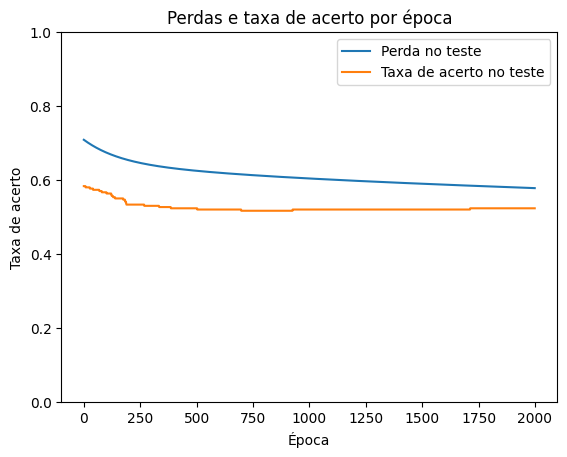

In [63]:
plt.plot(perdas_3_neuronios)
plt.plot(taxas_acerto_3_neuronios)
plt.title('Perdas e taxa de acerto por época')
plt.legend(['Perda no teste', 'Taxa de acerto no teste'])
plt.xlabel('Época')
plt.ylabel('Taxa de acerto')
plt.ylim(0,1)
plt.show()

In [55]:
def obter_pesos_vies(tamanho_entrada, tamanho_oculta1,tamanho_oculta2):
  tf.random.set_seed(31)

  pesos1 = tf.Variable(tf.random.normal([tamanho_entrada, tamanho_oculta1]))
  vies1 = tf.Variable(tf.random.normal([tamanho_oculta1]))

  pesos2 = tf.Variable(tf.random.normal([tamanho_oculta1, tamanho_oculta2]))
  vies2 = tf.Variable(tf.random.normal([tamanho_oculta2]))

  pesos_final = tf.Variable(tf.random.normal([tamanho_oculta2, 1])) # Corrected shape
  vies_final = tf.Variable(tf.random.normal([1]))

  return pesos1, vies1, pesos2, vies2, pesos_final, vies_final

In [56]:
variaveis = obter_pesos_vies(quantidade_de_features, 6, 4)
pesos1, vies1, pesos2, vies2, pesos_final, vies_final = variaveis


In [57]:
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)

perdas = []
taxas_acerto = []
qtd_epocas = 1000

def neuronio(x, pesos, vies):
  return tf.add(tf.matmul(x, pesos), vies)

for epoca in range(qtd_epocas):
  with tf.GradientTape() as tape:
    treino1 = tf.sigmoid(neuronio(x_train, pesos1, vies1))
    treino2 = tf.sigmoid(neuronio(treino1, pesos2, vies2))
    treino3 = tf.sigmoid(neuronio(treino2, pesos_final, vies_final))
    custo = calculadora_perda(y_train, treino3)

perdas.append(custo.numpy())

teste1 = tf.sigmoid(neuronio(x_test, pesos1, vies1))
teste2 = tf.sigmoid(neuronio(teste1, pesos2, vies2))
teste3 = tf.sigmoid(neuronio(teste2, pesos_final, vies_final))

acertos = np.mean(y_test.numpy() == ((teste3.numpy() > 0.5) * 1))
taxas_acerto.append(acertos)

gradientes = tape.gradient(custo, variaveis)
otimizador_treino.apply_gradients(zip(gradientes, variaveis))



<Variable path=SGD/iteration, shape=(), dtype=int64, value=1>

In [58]:
print(f'Menor custo obtido com camadas ocultas: {min(perdas)}')
print(f'Maior taxa de acerto obtido com  camadas ocultas: {max(taxas_acerto)}')

Menor custo obtido com camadas ocultas: 0.6846211552619934
Maior taxa de acerto obtido com  camadas ocultas: 0.5666666666666667


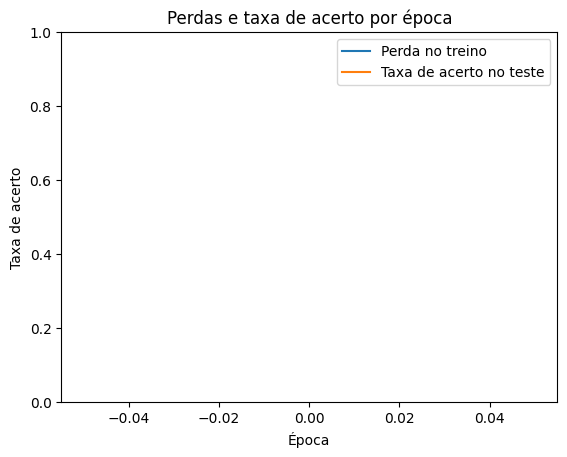

In [59]:
plt.plot(perdas)
plt.plot(taxas_acerto)
plt.title('Perdas e taxa de acerto por época')
plt.legend(['Perda no treino', 'Taxa de acerto no teste'])
plt.xlabel('Época')
plt.ylabel('Taxa de acerto')
plt.ylim(0,1)
plt.show()

In [60]:
variaveis = obter_pesos_vies(quantidade_de_features, 27, 6)
pesos1, vies1, pesos2, vies2, pesos_final, vies_final = variaveis

otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
qtd_epocas = 300

perdas = []
taxas_acerto = []

def neuronio(x, pesos, vies):
  return tf.add(tf.matmul(x, pesos), vies)

for epoca in range(qtd_epocas):
  with tf.GradientTape() as tape:
    treino1 = tf.nn.relu(neuronio(x_train, pesos1, vies1))
    treino2 = tf.nn.relu(neuronio(treino1, pesos2, vies2))
    treino3 = tf.sigmoid(neuronio(treino2, pesos_final, vies_final))
    custo = calculadora_perda(y_train, treino3)

  perdas.append(custo.numpy())

  teste1 = tf.nn.relu(neuronio(x_test, pesos1, vies1))
  teste2 = tf.nn.relu(neuronio(teste1, pesos2, vies2))
  teste3 = tf.sigmoid(neuronio(teste2, pesos_final, vies_final))

  acertos = np.mean(y_test.numpy() == ((teste3.numpy() > 0.5) * 1))
  taxas_acerto.append(acertos)

  gradientes = tape.gradient(custo, variaveis)
  otimizador_treino.apply_gradients(zip(gradientes, variaveis))

In [61]:
print(f'Menor custo obtido com relu nas camadas ocultas: {min(perdas)}')
print(f'Maior taxa de acerto obtido com relu nas camadas ocultas: {max(taxas_acerto)}')

Menor custo obtido com relu nas camadas ocultas: 0.4931633472442627
Maior taxa de acerto obtido com relu nas camadas ocultas: 0.5533333333333333


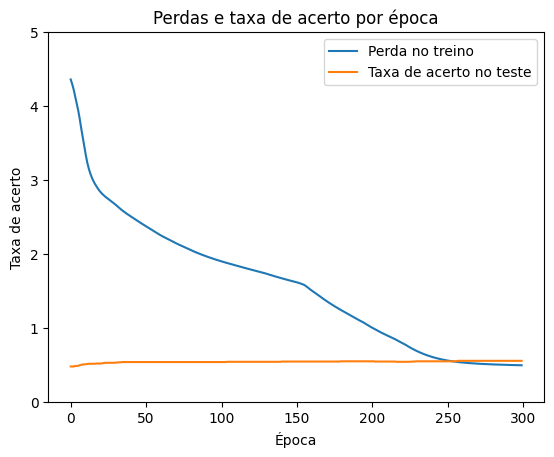

In [62]:
plt.plot(perdas)
plt.plot(taxas_acerto)
plt.title('Perdas e taxa de acerto por época')
plt.legend(['Perda no treino', 'Taxa de acerto no teste'])
plt.xlabel('Época')
plt.ylabel('Taxa de acerto')
plt.ylim(0,5)
plt.show()